In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow import keras

# 使用預訓練的 VGG16 模型，並去除頂部的全連接層
base_model = keras.applications.VGG16(
    weights='imagenet',
    input_shape=(224, 224, 3),
    include_top=False)

# 凍結基本模型的權重，使其在訓練期間不更新
base_model.trainable = False

In [ ]:
# 創建符合正確形狀的輸入
inputs = keras.Input(shape=(224, 224, 3))

# 將輸入通過基本模型
x = base_model(inputs, training=False)

# 添加池化層或平坦層
x = keras.layers.GlobalAveragePooling2D()(x)

# 添加最終的密集層，使用 softmax 激活函數
outputs = keras.layers.Dense(6, activation='softmax')(x)

# 將輸入和輸出結合以建立模型
model = keras.Model(inputs, outputs)

# 打印模型摘要
model.summary()

# 編譯模型，設定損失函數和評估指標
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (  (None, 512)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 6)                 3078      
                                                                 
Total params: 14717766 (56.14 MB)
Trainable params: 3078 (12.02 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 圖像資料增強器
datagen = ImageDataGenerator(
    samplewise_center=True,  # 將每個樣本的平均值設置為 0
    rotation_range=10,  # 在指定範圍內隨機旋轉圖像（度數，0 到 180）
    zoom_range=0.1,  # 隨機縮放圖像
    width_shift_range=0.1,  # 隨機水平位移圖像（總寬度的百分比）
    height_shift_range=0.1,  # 隨機垂直位移圖像（總高度的百分比）
    horizontal_flip=True,  # 隨機水平翻轉圖像
    vertical_flip=False)  # 我們不期望圖像上下翻轉，所以不進行垂直翻轉

# 載入並遍歷訓練集圖像資料
train_it = datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Food/training',
                                       target_size=(224, 224),
                                       color_mode='rgb',
                                       class_mode="categorical")

# 載入並遍歷驗證集圖像資料
valid_it = datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Food/validation',
                                       target_size=(224, 224),
                                       color_mode='rgb',
                                       class_mode="categorical")

Found 300 images belonging to 6 classes.
Found 90 images belonging to 6 classes.


In [ ]:
# 使用模型訓練，指定相關訓練和驗證資料集的設置參數
train_history = model.fit(train_it,
          validation_data=valid_it,
          steps_per_epoch=train_it.samples / train_it.batch_size,
          validation_steps=valid_it.samples / valid_it.batch_size,
          epochs=5)

Epoch 1/5
9/9 [==============================] - 26s 2s/step - loss: 3.8099 - accuracy: 0.3400 - val_loss: 2.1775 - val_accuracy: 0.4444
Epoch 2/5
9/9 [==============================] - 8s 898ms/step - loss: 2.8059 - accuracy: 0.4200 - val_loss: 1.5363 - val_accuracy: 0.6000
Epoch 3/5
9/9 [==============================] - 6s 647ms/step - loss: 2.3293 - accuracy: 0.5300 - val_loss: 1.5105 - val_accuracy: 0.5889
Epoch 4/5
9/9 [==============================] - 8s 909ms/step - loss: 1.7736 - accuracy: 0.5667 - val_loss: 1.4109 - val_accuracy: 0.6667
Epoch 5/5
9/9 [==============================] - 6s 631ms/step - loss: 1.5389 - accuracy: 0.6433 - val_loss: 1.1586 - val_accuracy: 0.6778


In [ ]:
# 在驗證集上評估模型表現
model.evaluate(valid_it, steps=valid_it.samples / valid_it.batch_size)

2/2 [==============================] - 1s 488ms/step - loss: 1.1903 - accuracy: 0.6667


[1.1903103590011597, 0.6666666865348816]

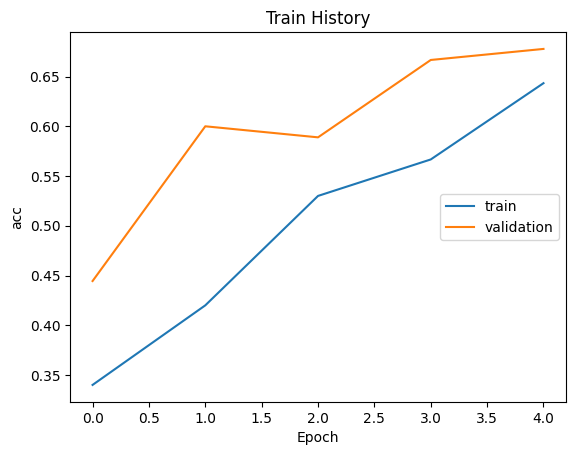

In [ ]:
import matplotlib.pyplot as plt

def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel('acc')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='center right')
    plt.show()

show_train_history(train_history, 'accuracy', 'val_accuracy')

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.imagenet_utils import preprocess_input

def show_image(image_path):
    image = mpimg.imread(image_path)
    plt.imshow(image)

def make_predictions(image_path):
    show_image(image_path)
    image = image_utils.load_img(image_path, target_size=(224, 224))
    image = image_utils.img_to_array(image)
    image = image.reshape(1,224,224,3)
    image = preprocess_input(image)
    preds = model.predict(image)
    return preds

Item_class = ['Bread', 'Dessert', 'Noodles-Pasta', 'Rice', 'Seafood', 'Soup']

1/1 [==============================] - 1s 1s/step


array([[6.1417492e-03, 9.7880632e-01, 1.4736509e-02, 8.6457135e-09,
        3.1539024e-04, 1.7327851e-08]], dtype=float32)

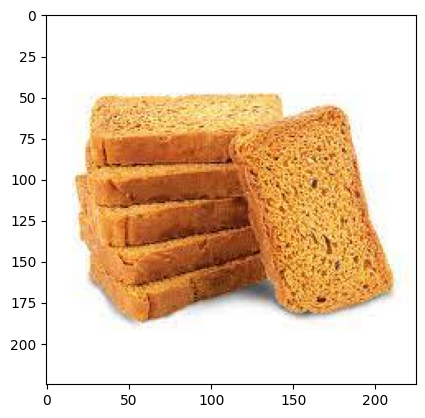

In [ ]:
make_predictions('/content/drive/MyDrive/Dataset/Food/testing/Bread.jpg')

In [ ]:
make_predictions('/content/drive/MyDrive/Dataset/Food/testing/Dessert.jpg')

1/1 [==============================] - 0s 27ms/step


array([[2.0083144e-06, 9.7990829e-01, 1.6983959e-05, 2.0063601e-02,
        2.1066232e-06, 7.0522242e-06]], dtype=float32)

1/1 [==============================] - 0s 27ms/step


array([[4.9080490e-17, 2.3119646e-13, 1.0000000e+00, 1.9623225e-09,
        2.7560666e-13, 1.3912765e-14]], dtype=float32)

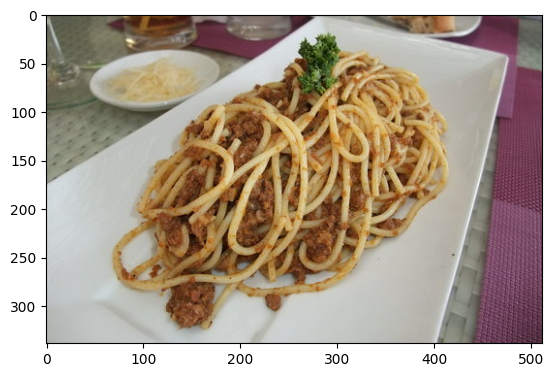

In [ ]:
make_predictions('/content/drive/MyDrive/Dataset/Food/testing/Noodles-Pasta.jpg')


1/1 [==============================] - 0s 28ms/step


array([[3.8119996e-09, 1.9889125e-05, 2.3740053e-03, 9.9760616e-01,
        6.9139192e-09, 7.0978863e-09]], dtype=float32)

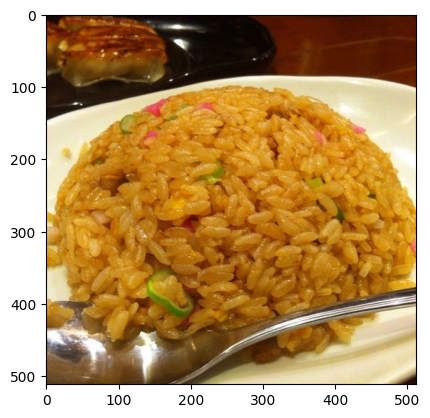

In [ ]:
make_predictions('/content/drive/MyDrive/Dataset/Food/testing/Rice.jpg')